<a href="https://colab.research.google.com/github/JacobFV/sodp-team114/blob/main/Sentiment_and_Semantics_of_COVID_Vaccine_Related_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SODP-team114

MASAYA HEYWOOD, KOPAL MATHUR, TEDDY SANDLER, JENNA SIMON, AND JACOB VALDEZ

Welcome to our Jupyter Notebook analyzing sentiment and semantics of COVID vaccine related tweets. This notebook, its encompassing repository, and accompannying website represents Team 114's submission in the 2021 Stanford Open Datathon.

## Getting Started

In [1]:
import random
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.signal
import IPython.display

import tensorflow as tf

!pip install -q hypertools transformers
import hypertools as hyp
import transformers

/usr/local/lib/python3.7/dist-packages/hypertools/plot/__init__.py:10: UserWarning: Could not switch backend to TkAgg.  This may impact performance of the plotting functions.
  warnings.warn('Could not switch backend to TkAgg.  This may impact performance of the plotting functions.')


## Load and process data

In [3]:
# I uploaded data.tar.xz
!tar -xf data.tar.xz

xz: (stdin): Unexpected end of input
tar: Unexpected EOF in archive
tar: Unexpected EOF in archive
tar: Error is not recoverable: exiting now


In [19]:
df1 = pd.read_csv('data/hashtag_covid_vaccine-1.csv')
df2 = pd.read_csv('data/hashtag_covid_vaccine-2.csv')
df3 = pd.read_csv('data/hashtag_covid_vaccine-3.csv')

### Processing `df1`

In [20]:
df1.head(1)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64.0,11.0,110.0,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App,False


In [21]:
tmp = []
for i, row in df1.iterrows():

    try:
        date = datetime.datetime.strptime(row.date, '%d-%m-%Y %H:%M')
    except:
        try:
            data = datetime.datetime.strptime(row.date, '%Y-%m-%d %H:%M:%S')
        except:
            print(f'invalid date: {row.date}')
            continue
        finally:
            pass
    finally:
        pass
    
    tmp.append(dict(
        text=row.text,
        date=date
    ))

df1 = pd.DataFrame(tmp)

In [22]:
df1.head()

,text,date
0,Australia to Manufacture Covid-19 Vaccine and ...,2020-08-18 12:55:00
1,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,2020-08-18 12:55:00
2,Deaths due to COVID-19 in Affected Countries\n...,2020-08-18 12:46:00
3,@Team_Subhashree @subhashreesotwe @iamrajchoco...,2020-08-18 12:45:00
4,@michellegrattan @ConversationEDU This is what...,2020-08-18 12:45:00


### Processing `df2`

In [23]:
df2.head(1)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1319174447442448384,1319153697406906369,2020-10-22 12:41:12 India Standard Time,2020-10-22,12:41:12,530,270371054,to_fly_to_live,Flynn Rider,NaN,@ANI Isn't it the best poll promise ever?? Fre...,en,['ani'],[],[],0,0,0,[],[],https://twitter.com/to_fly_to_live/status/1319...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'user_id': '355989081', 'username': 'ANI'}",NaN,NaN,NaN,NaN


In [24]:
df2['text'] = df2['tweet']

tmp = []
for i, row in df2.iterrows():

    dt = row.date + ' ' + row.time
    try:
        date = datetime.datetime.strptime(dt, '%d-%m-%Y %H:%M')
    except:
        try:
            data = datetime.datetime.strptime(dt, '%Y-%m-%d %H:%M:%S')
        except:
            print(f'invalid date: {dt}')
            continue
        finally:
            pass
    finally:
        pass
    
    tmp.append(dict(
        text=row.text,
        date=date
    ))

df2 = pd.DataFrame(tmp)

In [25]:
df2.head()

,text,date
0,@ANI Isn't it the best poll promise ever?? Fre...,2020-09-16 09:23:00
1,Now states shall have wait for thier Vidhan Sa...,2020-09-16 09:23:00
2,जिस मदारी ने ट्रेन तक नहीं चलाई और तुम पत्नी व...,2020-09-16 09:23:00
3,@MisseeMonis They said vaccine for all but not...,2020-09-16 09:23:00
4,"BJP really presenting ""free COVID vaccine"" as ...",2020-09-16 09:23:00


### Process `df3`

In [26]:
df3.head(1)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False


In [27]:
tmp = []
for i, row in df3.iterrows():

    try:
        date = datetime.datetime.strptime(row.date, '%d-%m-%Y %H:%M')
    except:
        try:
            data = datetime.datetime.strptime(row.date, '%Y-%m-%d %H:%M:%S')
        except:
            print(f'invalid date: {row.date}')
            continue
        finally:
            pass
    finally:
        pass
    
    tmp.append(dict(
        text=row.text,
        date=date
    ))

df3 = pd.DataFrame(tmp)

In [28]:
df3.head()

,text,date
0,Same folks said daikon paste could treat a cyt...,2020-09-16 09:23:00
1,While the world has been on the wrong side of ...,2020-09-16 09:23:00
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,2020-09-16 09:23:00
3,"Facts are immutable, Senator, even when you're...",2020-09-16 09:23:00
4,Explain to me again why we need a vaccine @Bor...,2020-09-16 09:23:00


## Explore datasets

In [29]:
len(df1), len(df2), len(df3)

(23669, 209929, 7783)

In [30]:
display(df1.head())
display(df2.head())
display(df3.head())

,text,date
0,Australia to Manufacture Covid-19 Vaccine and ...,2020-08-18 12:55:00
1,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,2020-08-18 12:55:00
2,Deaths due to COVID-19 in Affected Countries\n...,2020-08-18 12:46:00
3,@Team_Subhashree @subhashreesotwe @iamrajchoco...,2020-08-18 12:45:00
4,@michellegrattan @ConversationEDU This is what...,2020-08-18 12:45:00


,text,date
0,@ANI Isn't it the best poll promise ever?? Fre...,2020-09-16 09:23:00
1,Now states shall have wait for thier Vidhan Sa...,2020-09-16 09:23:00
2,जिस मदारी ने ट्रेन तक नहीं चलाई और तुम पत्नी व...,2020-09-16 09:23:00
3,@MisseeMonis They said vaccine for all but not...,2020-09-16 09:23:00
4,"BJP really presenting ""free COVID vaccine"" as ...",2020-09-16 09:23:00


,text,date
0,Same folks said daikon paste could treat a cyt...,2020-09-16 09:23:00
1,While the world has been on the wrong side of ...,2020-09-16 09:23:00
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,2020-09-16 09:23:00
3,"Facts are immutable, Senator, even when you're...",2020-09-16 09:23:00
4,Explain to me again why we need a vaccine @Bor...,2020-09-16 09:23:00


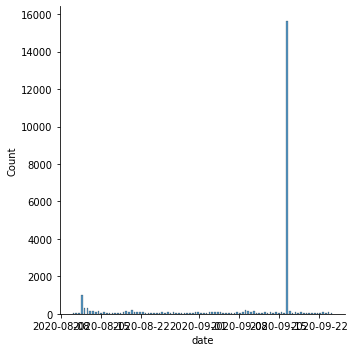

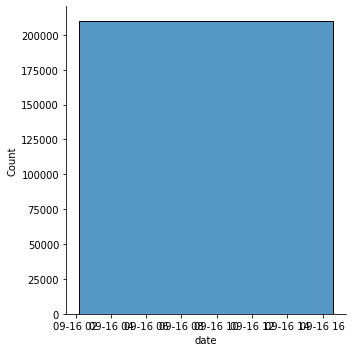

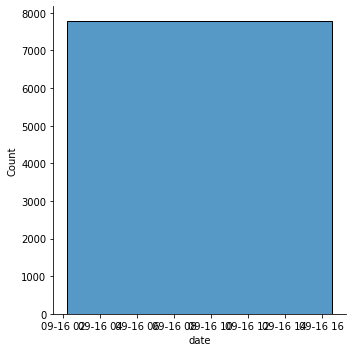

In [56]:
sns.displot(df1.date, shrink=0.6)
sns.displot(df2.date, shrink=0.6)
sns.displot(df3.date, shrink=0.6)
plt.show()

In [48]:
def toDaysRelative(dt):
    days_in_year = 366 if dt.is_leap_year else 365
    year_fraction = dt.dayofyear + (60*60*dt.hour + 60*dt.minute + dt.second) / (24*60*60)
    return dt.year + (year_fraction / days_in_year)

toDaysRelative(x)

2020.6326180176077

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

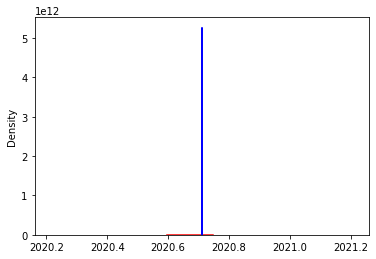

In [59]:
sns.distplot([toDaysRelative(dt) for dt in df1.date], color='red')
sns.distplot([toDaysRelative(dt) for dt in df2.date], color='green')
sns.distplot([toDaysRelative(dt) for dt in df3.date], color='blue')
plt.show()

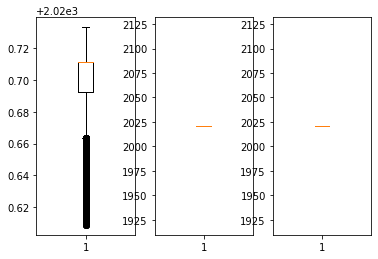

In [61]:
fig, axes = plt.subplots(1, 3)

axes[0].boxplot([toDaysRelative(dt) for dt in df1.date])
axes[1].boxplot([toDaysRelative(dt) for dt in df2.date])
axes[2].boxplot([toDaysRelative(dt) for dt in df3.date])

plt.show()

It appears that only `df1` covers a significant span of time. Therefore, we will use this dataset to analyze timeseries.

{'boxes': [<matplotlib.lines.Line2D at 0x7f552fb5ea50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f552f808ad0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f552f801b10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f552f8015d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f552f808050>,
  <matplotlib.lines.Line2D at 0x7f552f808590>]}

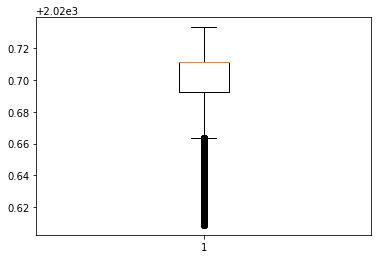

In [72]:
df1_dates = [toDaysRelative(dt) for dt in df1.date]
plt.boxplot(df1_dates[::50])

## Build sentiment and semantic analysis utility functions

### Load ML models

In [62]:
classifier = transformers.pipeline('sentiment-analysis')

In [63]:
from transformers import BertTokenizer, TFBertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained("bert-base-uncased")

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


### Example usage

`classifier` produces a POSITIVE/NEGATIVE label classification with a floating-point valued output [0,1] indicating classification certainty.

`model` is a BERT language encoder. Basically, it converts a sentence into a 768-dimensional vector.

In [77]:
classifier(["I'm excited about getting the vaccine!",
            "I'm sick with the coronavirus"])

[{'label': 'POSITIVE', 'score': 0.9996540546417236},
 {'label': 'NEGATIVE', 'score': 0.999416708946228}]

In [78]:
text = "COVID is made up"
encoded_input = tokenizer(text, return_tensors='tf')
output = model(encoded_input)
output

TFBaseModelOutputWithPooling([('last_hidden_state',
                               <tf.Tensor: shape=(1, 7, 768), dtype=float32, numpy=
                               array([[[-0.21936978,  0.07017213,  0.07137642, ..., -0.3403647 ,
                                         0.21772459,  0.64096576],
                                       [-0.5038416 , -0.6416414 ,  0.662215  , ..., -0.43450135,
                                         0.6450827 ,  0.98320436],
                                       [ 0.19287986, -0.05116391,  0.11417533, ...,  0.03888023,
                                         0.26550043,  0.88543904],
                                       ...,
                                       [-0.5965658 , -0.10243181, -0.11949789, ...,  0.03236017,
                                         0.0706492 ,  0.513479  ],
                                       [ 0.03660946, -1.1083236 ,  0.4871317 , ...,  0.23205262,
                                         0.54832274,  0.87375534],


In [79]:
%%timeit
classifier(["Time of processing a single statement"])

10 loops, best of 5: 40.4 ms per loop


In [80]:
%%timeit
text = "Time of processing a single statement"
encoded_input = tokenizer(text, return_tensors='tf')
output = model(encoded_input)
output

1 loop, best of 5: 227 ms per loop


### Run Analyses

In [128]:
def analyze_data(df, make_embeddings=True):

    display(df.head(5))
    df = df.sort_values('date')

    processed = []
    for i, row in df[::50].iterrows():

        sentiment = classifier([row.text])

        continuous_sentiment = sentiment[0]['score']
        if sentiment[0]['label'] == 'NEGATIVE':
            continuous_sentiment *= -1

        if make_embeddings:
            embedding = model(tokenizer(row.text, return_tensors='tf'))
        else:
            embedding = None

        processed.append(dict(
            text=row.text, 
            date=row.date,
            sentiment=continuous_sentiment,
            embedding=embedding
        ))
    processed_df = pd.DataFrame(processed)

    return processed_df

processed_df1 = analyze_data(df1, make_embeddings=True)

,text,date
0,Australia to Manufacture Covid-19 Vaccine and ...,2020-08-18 12:55:00
1,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,2020-08-18 12:55:00
2,Deaths due to COVID-19 in Affected Countries\n...,2020-08-18 12:46:00
3,@Team_Subhashree @subhashreesotwe @iamrajchoco...,2020-08-18 12:45:00
4,@michellegrattan @ConversationEDU This is what...,2020-08-18 12:45:00


## Visualize sentiment over time (the wrong way)

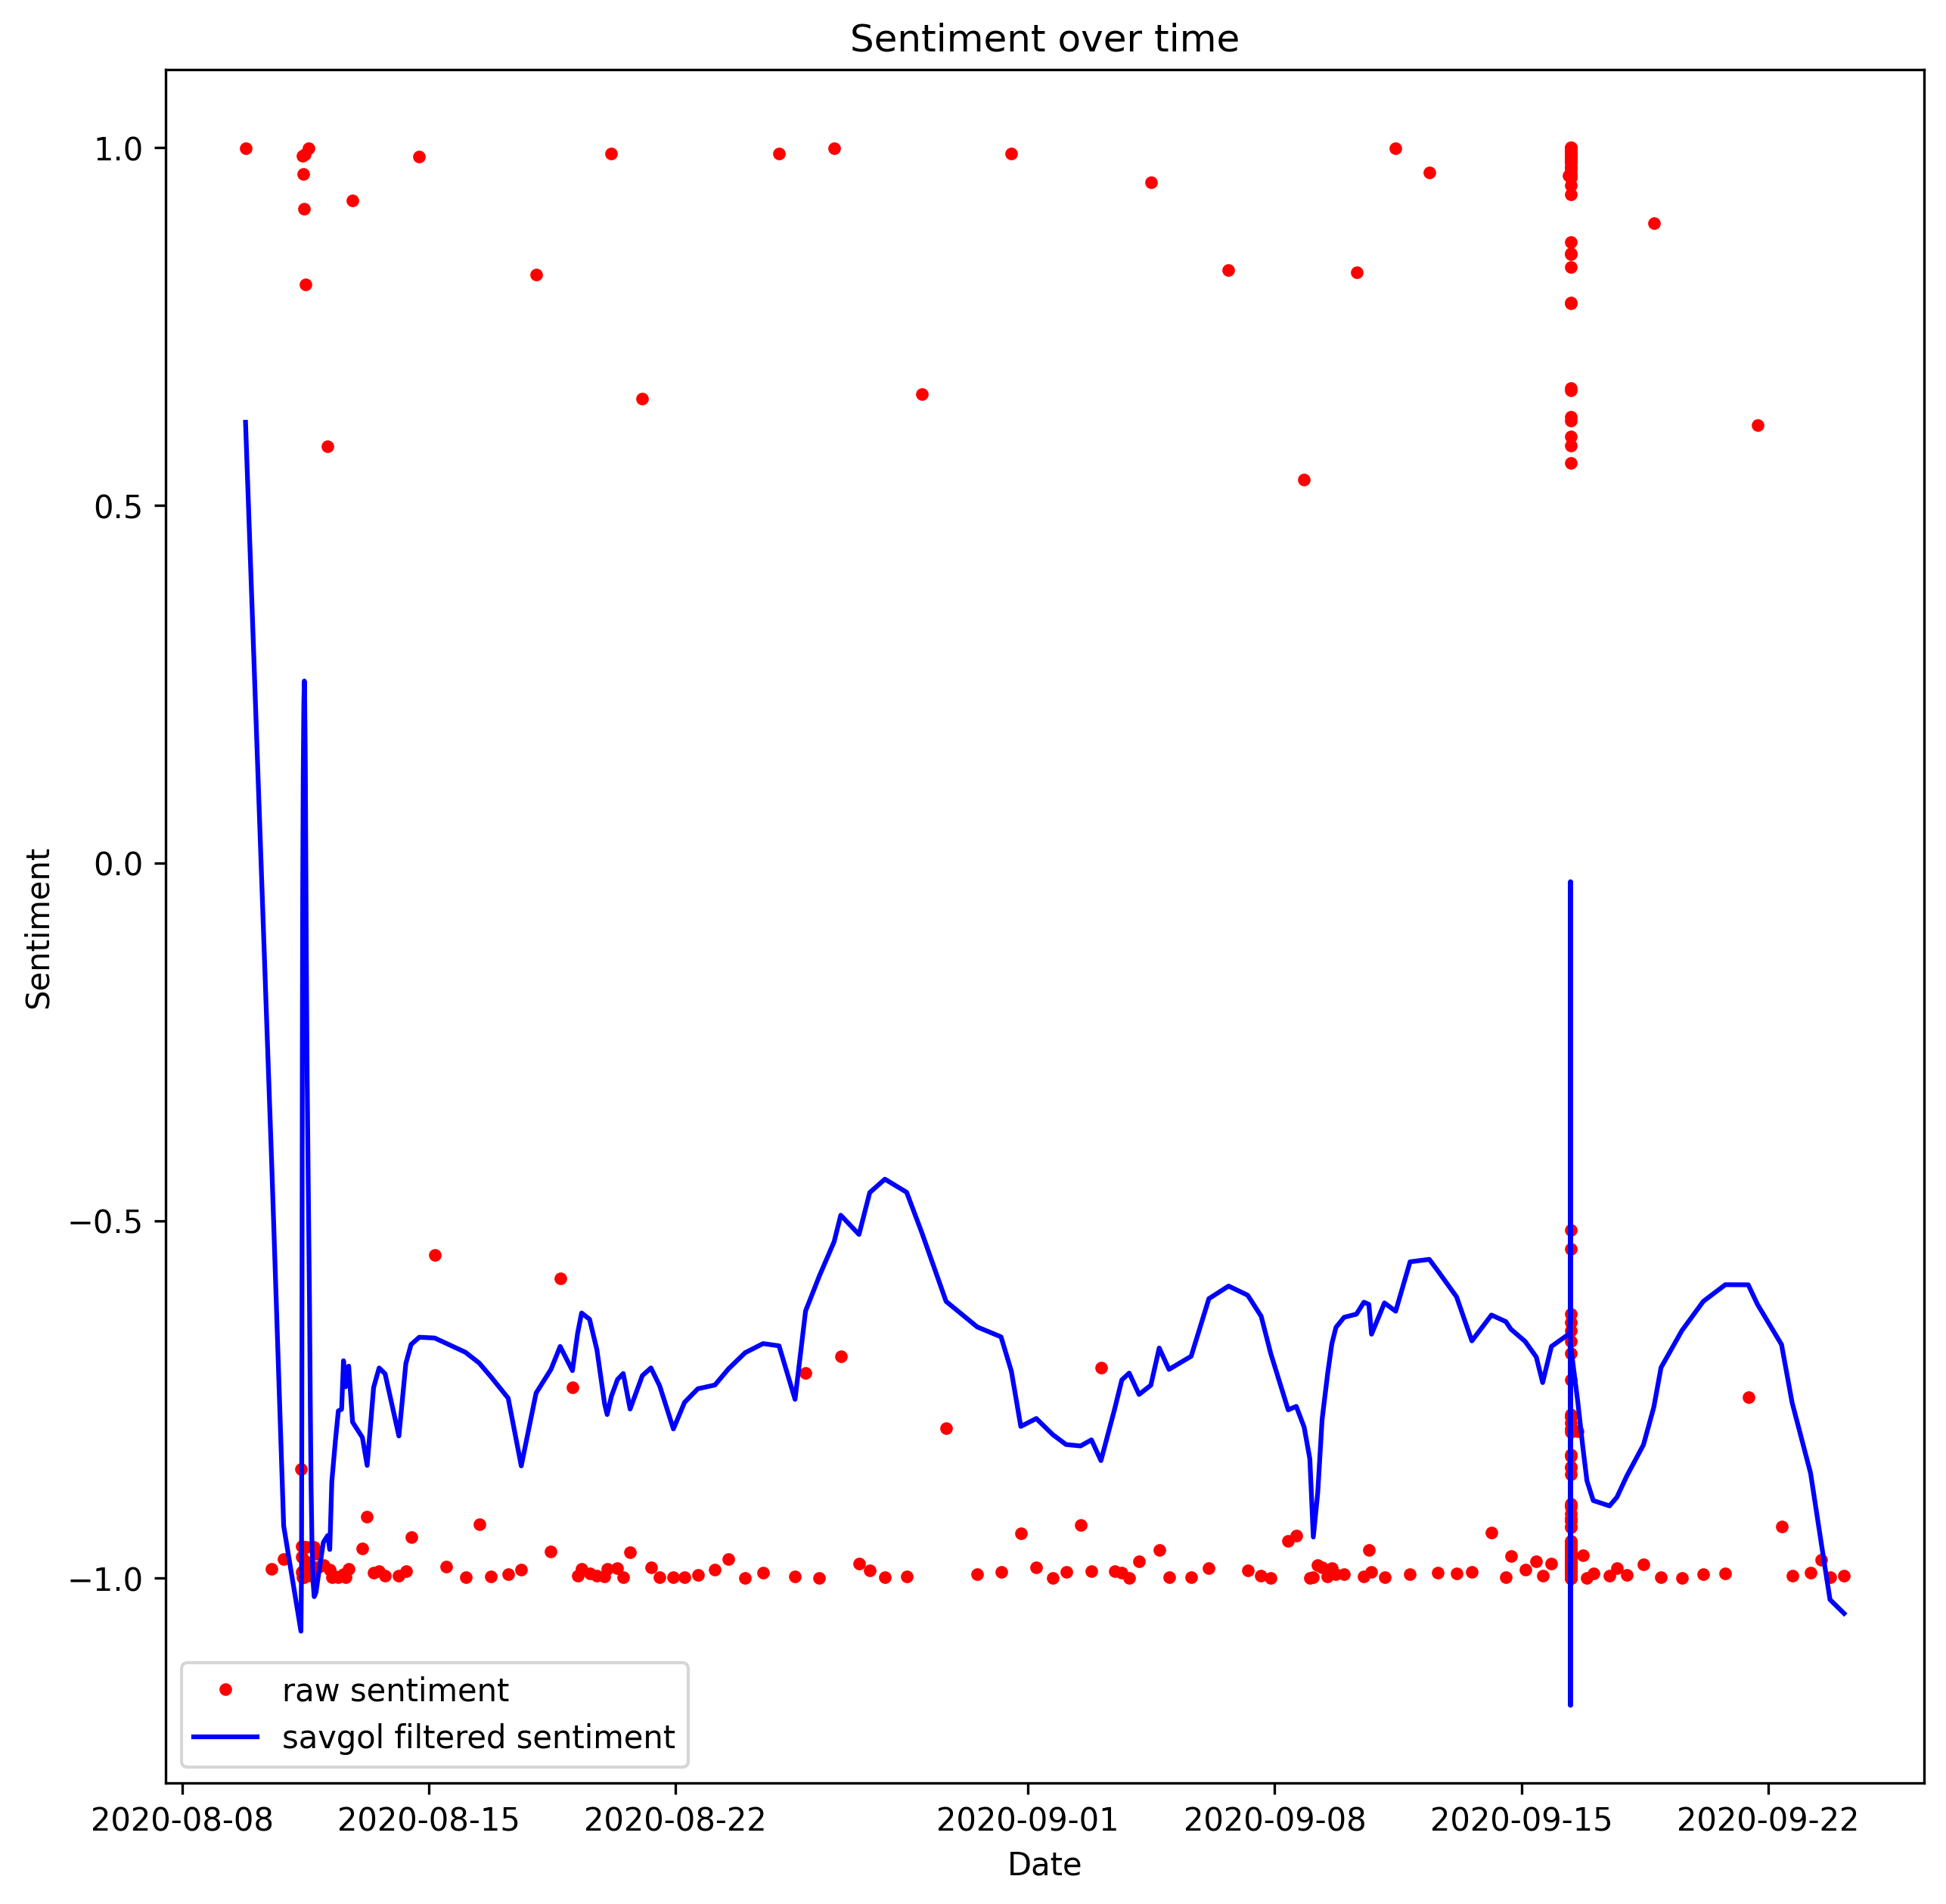

In [94]:
plt.figure(figsize=(10, 10), dpi=300)

df1_sorted = processed_df1.sort_values('date')
plt.plot(df1_sorted.date, df1_sorted.sentiment, '.', color='red')
smoothed_sentiment = scipy.signal.savgol_filter(df1_sorted.sentiment, 51, 7) # window size 51, polynomial order 3
plt.plot(df1_sorted.date, smoothed_sentiment, color='blue')

plt.title('Sentiment over time')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.legend(['raw sentiment', 'savgol filtered sentiment'])
plt.show()

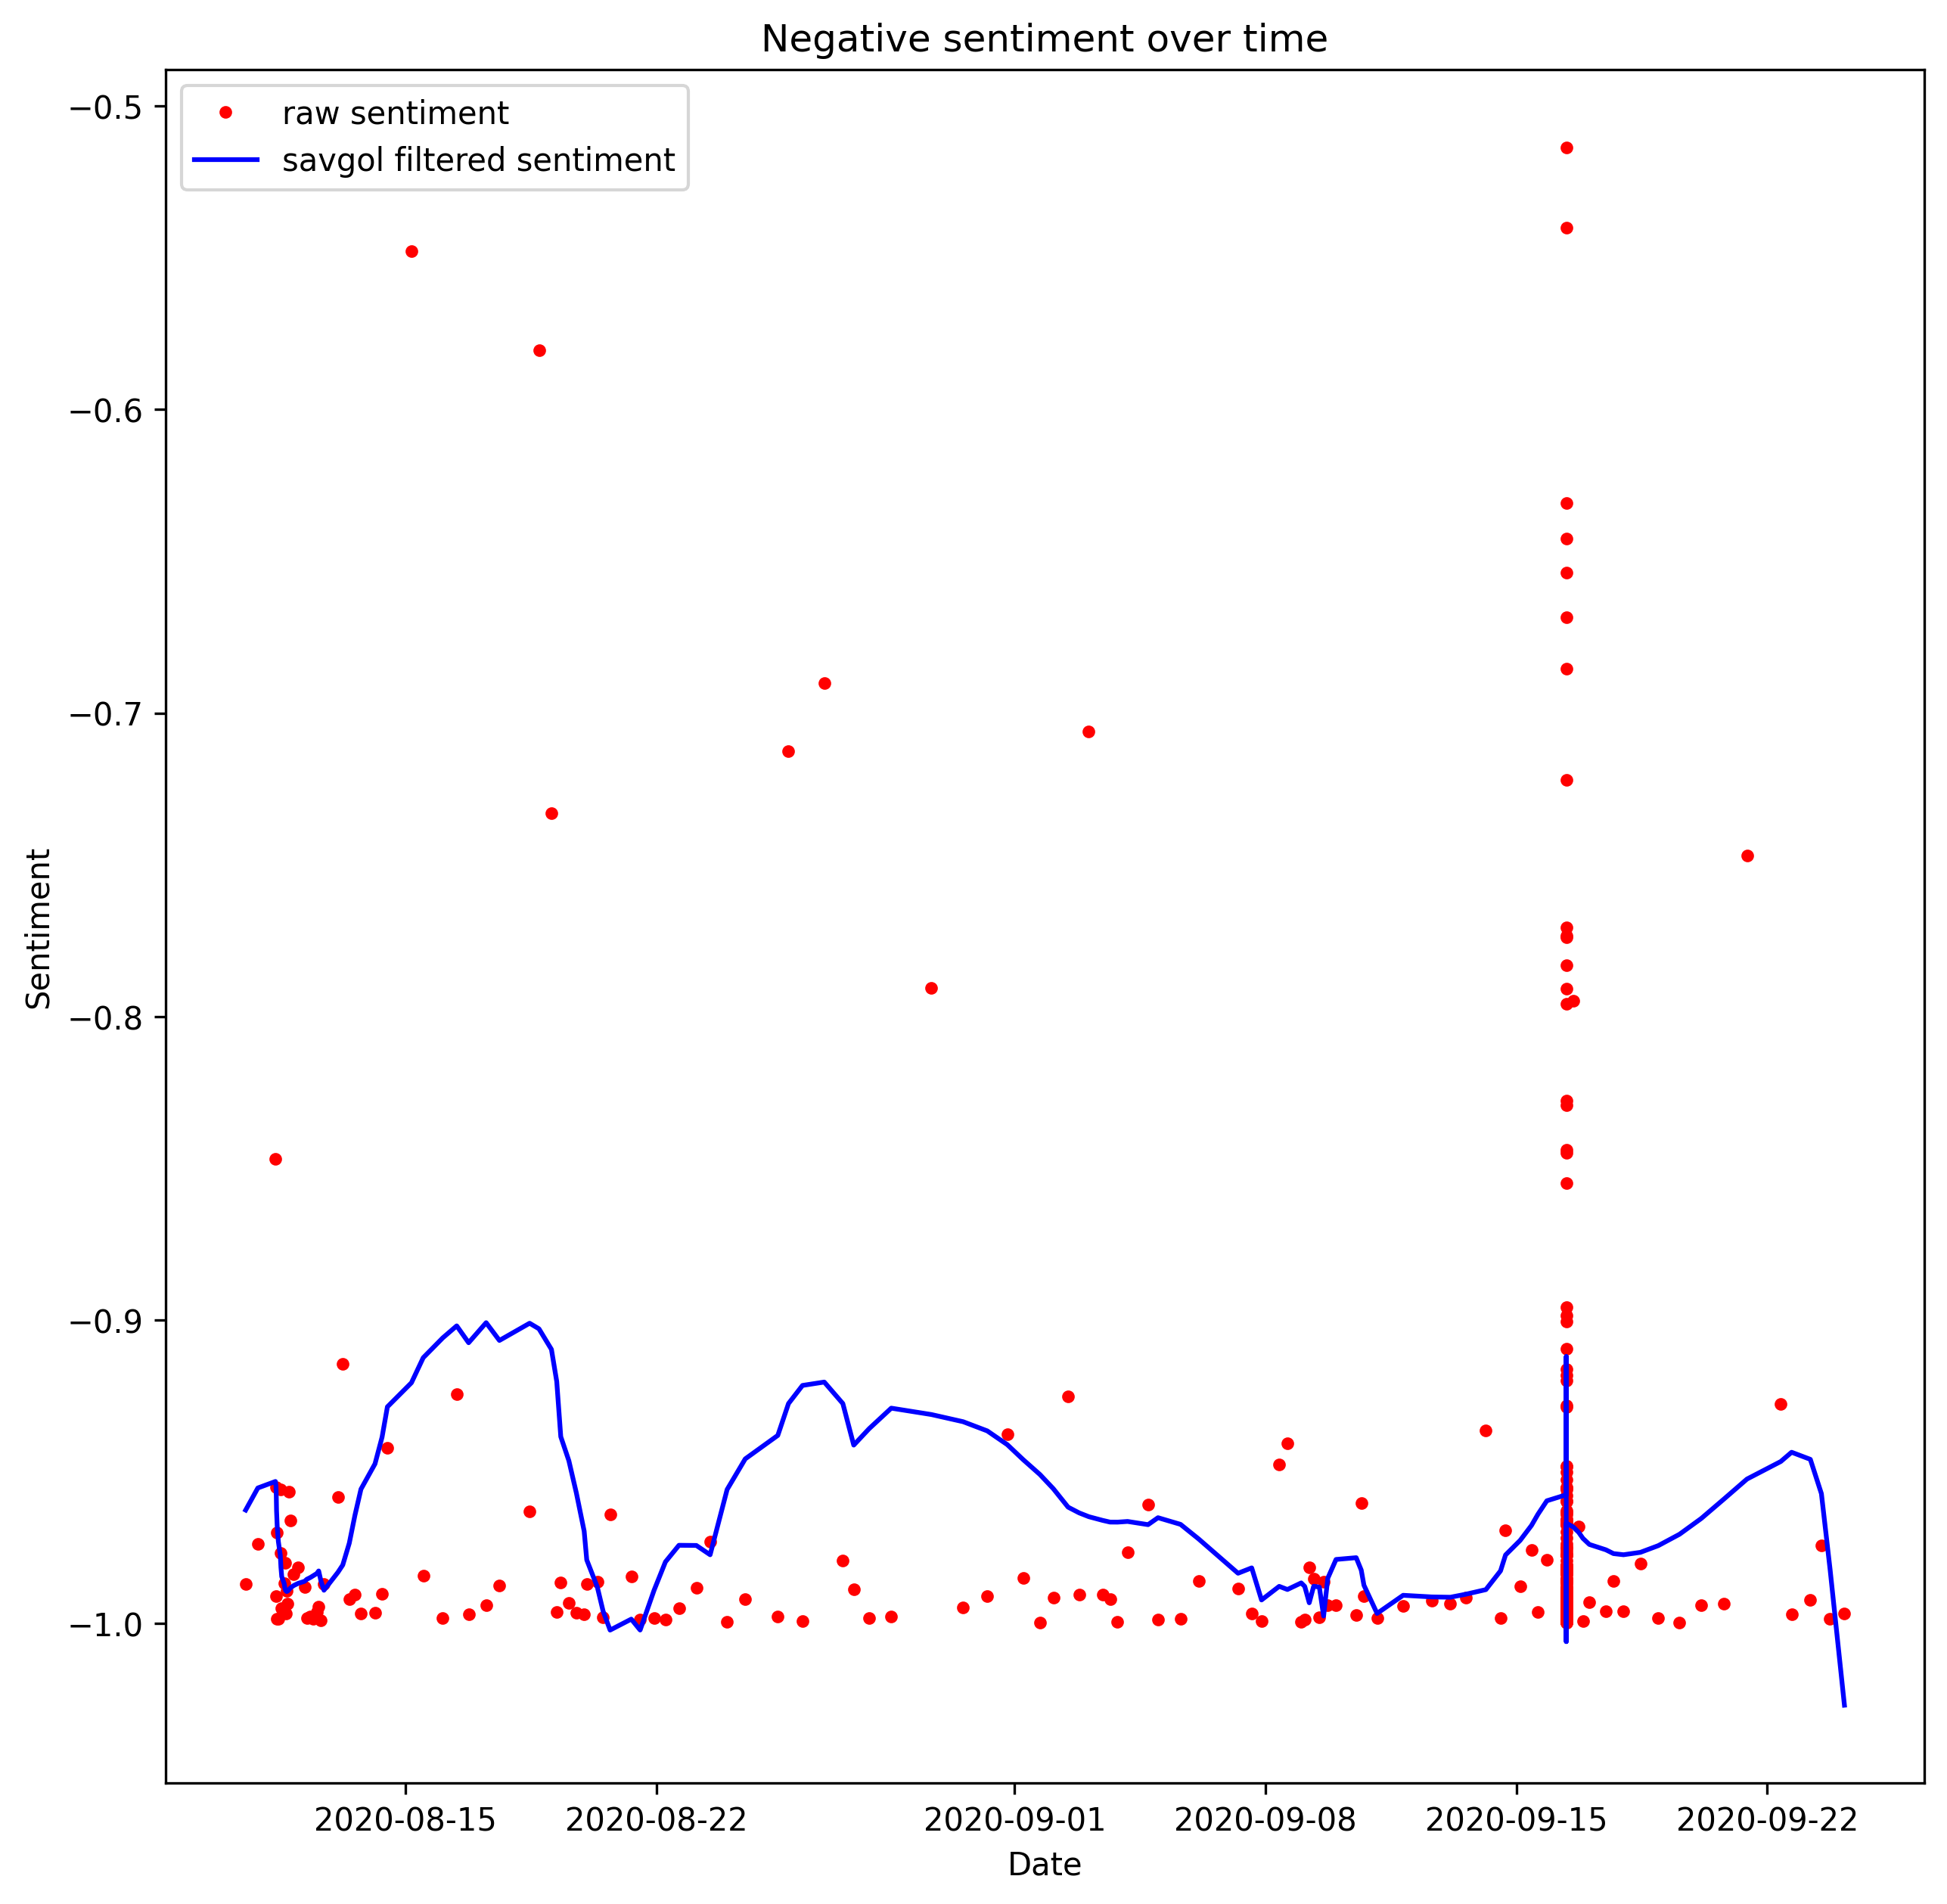

In [92]:
plt.figure(figsize=(10, 10), dpi=300)

df1_sorted = processed_df1.sort_values('date')

neg_df1_sorted = df1_sorted[df1_sorted.sentiment <= 0]

plt.plot(neg_df1_sorted.date, neg_df1_sorted.sentiment, '.', color='red')
smoothed_sentiment = scipy.signal.savgol_filter(neg_df1_sorted.sentiment, 51, 7) # window size 51, polynomial order 3
plt.plot(neg_df1_sorted.date, smoothed_sentiment, color='blue')

plt.title('Negative sentiment over time')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.legend(['raw sentiment', 'savgol filtered sentiment'])

plt.show()

We later realized that these fluctuations may reflect the true sentiment of statements, but they may also reflect the certainty of the classifier. Therefore, we discarded this data in favor of the [Coronavirus (COVID-19) Tweets Dataset](https://ieee-dataport.org/open-access/coronavirus-covid-19-tweets-dataset#files). The spreadsheet and publication chart for that data is accessible from our [project site](https://sodp-team114.herokuapp.com/)

## Visualize sentiment over time (less biased approach

In [2]:
# I uploaded 'corona_tweets_09.csv' from 
# https://ieee-dataport.org/open-access/coronavirus-covid-19-tweets-dataset

ct9 = pd.read_csv('corona_tweets_09.csv')
ct9.head()

,1243071692966105088,0
0,1243071693133942784,-0.125000
1,1243071693347643393,0.233333
2,1243071693611880448,0.000000
3,1243071693498638336,-0.133333
4,1243071693821747201,-0.062500


In [3]:
def plot_vals(vals, title):
    print(f'\nmean={vals.mean()}, meadian={scipy.median(vals)}\n')

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    sns.distplot(vals, rug=True, ax=axes[0])
    axes[0].set_xlabel('Sentiment')
    axes[0].set_ylabel('Frequency')

    axes[1].boxplot(vals)
    axes[1].set_ylabel('Sentiment')

    fig.suptitle(title)
    plt.show()

### Unstratified sampling

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.median is deprecated and will be removed in SciPy 2.0.0, use numpy.median instead
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



mean=0.04918822590081064, meadian=0.0



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


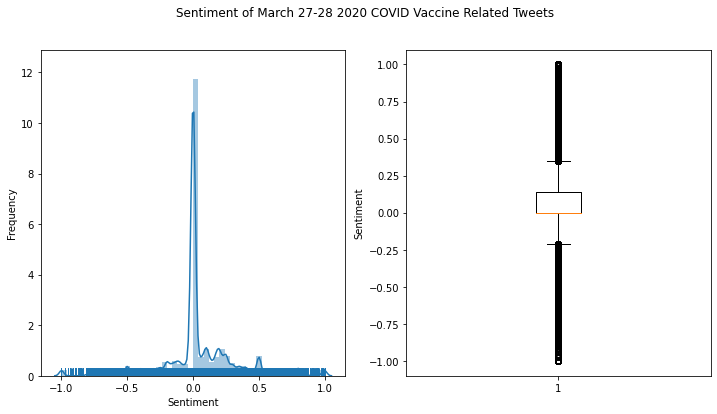

In [4]:
vals = ct9['0']
vals = vals.to_numpy()

plot_vals(vals, 'Sentiment of March 27-28 2020 COVID Vaccine Related Tweets')

### $x \le -0.05 \mathrm{\ or\ } 0.05 \le x$ 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.median is deprecated and will be removed in SciPy 2.0.0, use numpy.median instead
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



mean=0.09570094913863447, meadian=0.13392857142857142



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


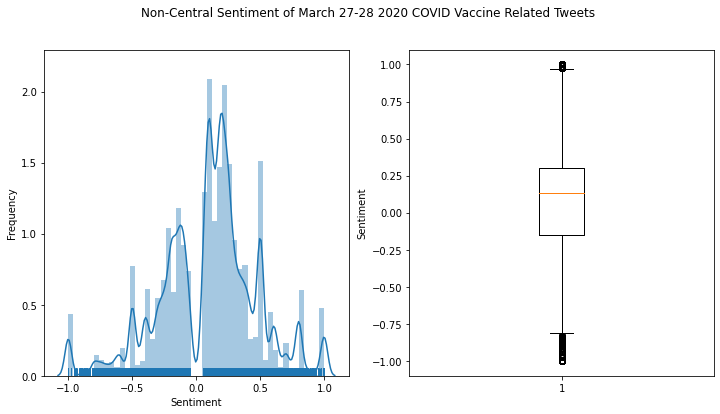

In [5]:
vals = ct9['0']
vals = vals.to_numpy()
vals = [val for val in vals
        if val >= 0.05 or val <= -0.05]
vals = np.array(vals)

plot_vals(vals, r'Non-Central Sentiment of March 27-28 2020 COVID Vaccine Related Tweets')

### $x \ge 0.05$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.median is deprecated and will be removed in SciPy 2.0.0, use numpy.median instead
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



mean=0.3124805752967794, meadian=0.25



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


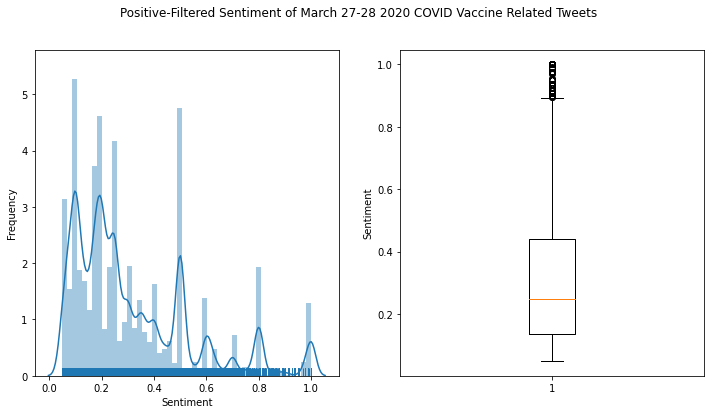

In [6]:
vals = ct9['0']
vals = vals.to_numpy()
vals = vals[vals >= 0.05]

plot_vals(vals, r'Positive-Filtered Sentiment of March 27-28 2020 COVID Vaccine Related Tweets')

### $x \le -0.05$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.median is deprecated and will be removed in SciPy 2.0.0, use numpy.median instead
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



mean=-0.30970065211674563, meadian=-0.22083333333333333



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


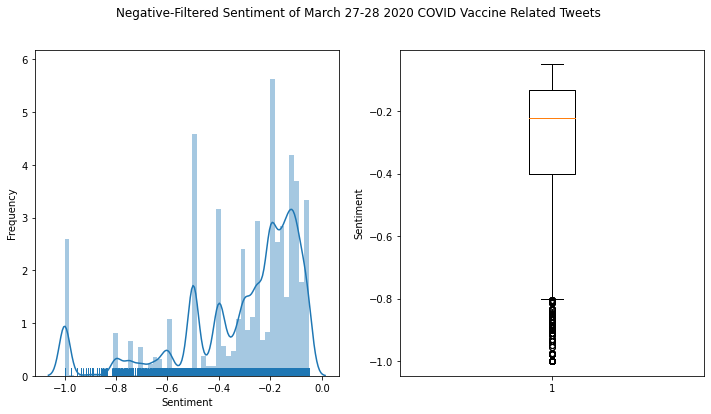

In [7]:
vals = ct9['0']
vals = vals.to_numpy()
vals = vals[vals <= -0.05]

plot_vals(vals, r'Negative-Filtered Sentiment of March 27-28 2020 COVID Vaccine Related Tweets')

## Visualize semantic clusters

In [130]:
cluster_ds = processed_df1[processed_df1.sentiment < 0]
cluster_ds = cluster_ds[cluster_ds.text!='']
cluster_ds.text

1      August 28 webinar - COVID Vaccine Research &am...
2      Covid-19 vaccines may cause mild side effects,...
3      Russia has developed first coronavirus vaccine...
4      : Legendary Putin claimed that Russian Vaccine...
5      Russia makes the first #COVID19\nVaccine!\n\nh...
                             ...                        
469    I'm worried too. Very worried. \n#SARSCoV2 #CO...
470    So, Wuhan has "fully recovered" without any pr...
471    Pharma giant Johnson &amp; Johnson just launch...
472    @timesofindia @TOIWorld #WHO is this guy? When...
473    While there is no indication that #Trump’s des...
Name: text, Length: 382, dtype: object

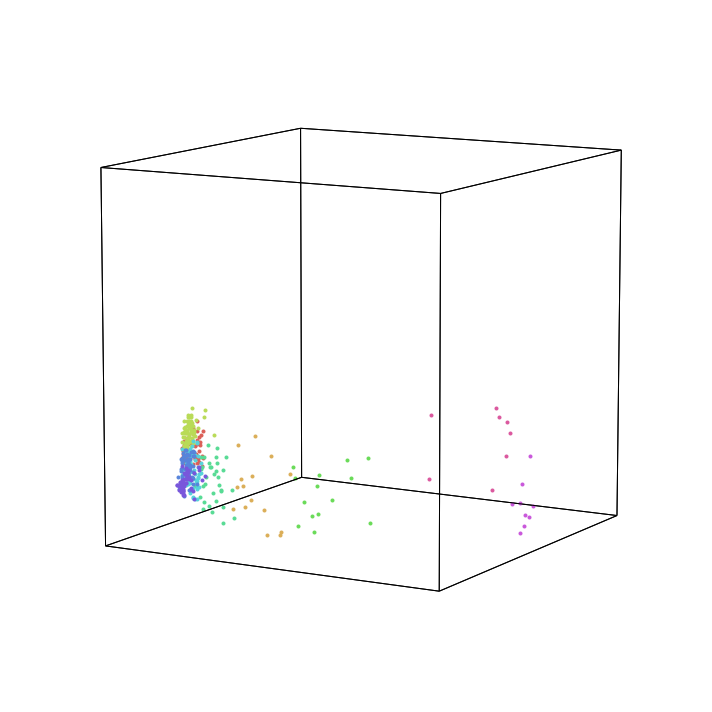

/usr/local/lib/python3.7/dist-packages/hypertools/plot/plot.py:487: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  kwargs[kwarg]=np.array(kwargs[kwarg])


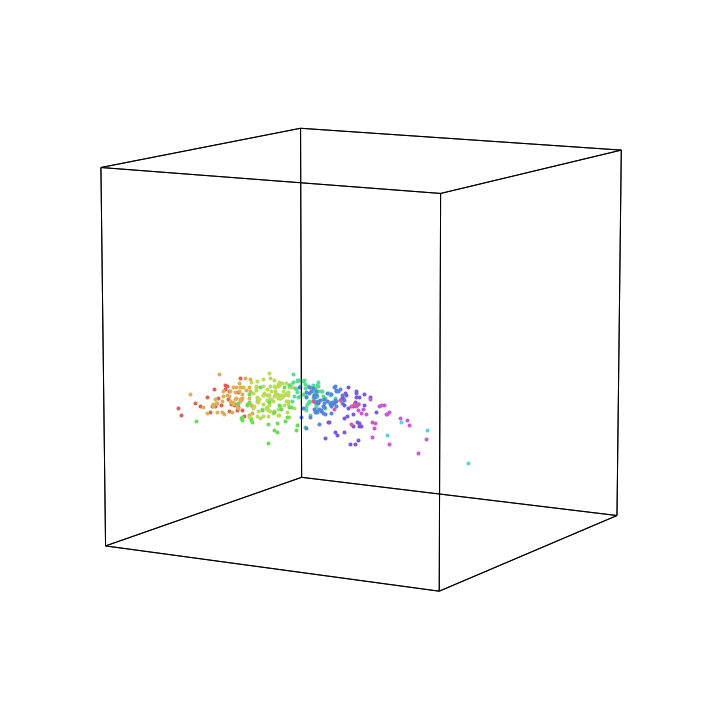

/usr/local/lib/python3.7/dist-packages/hypertools/plot/plot.py:487: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  kwargs[kwarg]=np.array(kwargs[kwarg])


In [133]:
K = 10

np_emb = [row.embedding['last_hidden_state'].numpy()[:, -1, :] for row in cluster_ds.itertuples()]
hyp.plot(np_emb, '.', zoom=0.1, n_clusters=K, size=(10, 10))
plt.show()

np_emb = [row.embedding['pooler_output'].numpy() for row in cluster_ds.itertuples()]
hyp.plot(np_emb, '.', zoom=0.1, n_clusters=K, size=(10, 10))
plt.show()

clusters2020 = np.array(hyp.cluster(np_emb, n_clusters=K))

## Qualitatively analyze clusters

In [134]:
cluster_bins = {k: list() for k in range(K)}
for k_select in range(K):
    print(f'Looking at cluster {k_select} with {sum((clusters2020==k_select).astype(int))} elements:\n')
    #print(sum((clusters2020==k_select).astype(int)))
    for i, ki in enumerate(clusters2020):
        if ki == k_select:
            try:
                text = cluster_ds.loc[i].text.strip()
                cluster_bins[ki].append(text)
                print(text)
            except:
                pass
    print(96*'=' + '\n')

Looking at cluster 0 with 23 elements:

: Legendary Putin claimed that Russian Vaccine is ready to be distributed. He claims he used the vaccine on his dau… https://t.co/jneZcY9ecY
#Scientists ask: Without trial data, how can we trust #Russia's #Covidvaccine? https://t.co/txahNbGb0O
Seriously, guys, this year has been the worst and the hits keep coming (for the nation, for all of us, but also for… https://t.co/d5F1mcZGOy
As @narendramodi mentioned about #CovidVaccine so why are we taking risks with Millions of Student's life and their… https://t.co/gOuBdbt0Sf
Health workers' army to be trained to deliver #Covidvaccine!!
Join with us online at #vaccinerd2020
Email: vacciner… https://t.co/mvBflGDnpW
Covidvacince latest updates 
#COVID #COVID__19 #COVID19 #CovidVaccine https://t.co/4NL1CHtttt
Prevent any restrictions on those who refuse a #COVID19 vaccination

#coronavirus
#COVID
#COVID__19
#CovidVaccine… https://t.co/DC1Pa73mro
World's First Registered Russian Vaccine Against COVID-19 Pr

Note to the reader of our article: we accidently reran the clustering algorithm since write the article so we are not able to reproduce the results given in our Analysis section and Appendix. Also please ignore the statements `Looking at cluster X with X elements:` since some elements are passed over. In reality, cluster bin counts are `[len(l) for k, l in cluster_bins.items()] = [20, 7, 19, 29, 59, 58, 33, 2, 73, 11]` which means only 311/474 text elements are semantically clustered.